# Random forest

In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

## Load data that was downloaded in the 2.process-data


In [2]:
data_dir = os.path.join("..", "..", "2.process-data", "data")
os.listdir(data_dir)

['test.tsv.gz',
 'test_processed.tsv.gz',
 'train.tsv.gz',
 'train_processed.tsv.gz']

In [3]:
train_file = os.path.join(data_dir, 'train_processed.tsv.gz')
train_data = pd.read_csv(train_file, sep='\t')
train_data.head()

,cell_code,cell_id,plate,replicate,well,field,target,actin.s.area,actin.s.radius.mean,actin.s.radius.sd,...,DNA.b.q005,DNA.b.q05,DNA.m.cx,DNA.m.cy,DNA.m.majoraxis,DNA.m.eccentricity,DNA.m.theta,dist.10.nn,dist.20.nn,nuclear.displacement
0,nvinVnCJ2k,181,P1,2,M14,4,CDK,0.4349,0.3981,0.1857,...,0.8,0.4091,0.5019,0.1583,0.2335,0.2173,0.0609,-0.1952,-0.0937,0.8118
1,3wwGtQB4h0,51,P1,1,O10,2,TopoII,2.0164,1.5199,1.1439,...,-0.3,-0.7727,0.7544,0.0878,1.8350,0.3322,-0.0835,3.0651,2.3947,0.7204
2,52OC9XLp4T,184,P4,2,H18,3,cellcycle,-0.8605,-1.1614,-0.9008,...,0.3,2.5000,0.0940,0.2282,-0.7014,0.1822,-0.8271,-0.2987,-0.4236,-0.7567
3,y9Hqm6TiZs,97,P1,2,O10,2,TopoII,0.7397,0.8127,1.7630,...,-0.9,-1.3636,0.5657,0.8751,1.3179,-1.2370,0.1351,2.1759,1.9297,2.5346
4,qBSbXA5Aqs,56,P1,2,B11,2,dopaminereceptor,-0.2825,-0.2973,-0.1175,...,0.3,-0.7273,0.9267,0.8859,-0.1454,-1.1055,0.4967,-0.5557,-0.2487,0.8829


In [4]:
test_file = os.path.join(data_dir, 'test_processed.tsv.gz')
test_data = pd.read_table(test_file, sep='\t')
test_data.head()

,cell_code,cell_id,plate,replicate,well,field,target,actin.s.area,actin.s.radius.mean,actin.s.radius.sd,...,DNA.b.q005,DNA.b.q05,DNA.m.cx,DNA.m.cy,DNA.m.majoraxis,DNA.m.eccentricity,DNA.m.theta,dist.10.nn,dist.20.nn,nuclear.displacement
0,9WCNgO9979,161,P1,1,B12,3,CDK,1.1504,1.4310,2.2998,...,0.3636,1.2273,-0.3505,0.0424,0.2177,0.1427,0.0187,-0.1517,-0.1932,0.0729
1,ITGSi7suUv,93,P1,2,P14,1,DNAMetabolism,0.4901,0.7478,1.9092,...,-1.0909,-0.5000,-0.5597,-0.0847,0.3932,0.4099,0.7547,2.2979,1.7543,3.6060
2,hy5VSYhyMd,38,P1,2,I13,3,cMyc,-0.0276,-0.1529,-0.8382,...,0.0000,-0.4091,0.1848,0.3894,0.0558,0.3528,-0.1393,-0.2972,0.2014,-0.0010
3,cQZr1sEf16,155,P1,2,H21,3,DNA_intercalation,3.2319,2.2128,1.1178,...,0.6364,-0.0455,0.2892,0.3139,3.0896,0.9074,0.5710,-0.0849,-0.3078,2.5676
4,F4WIRYOJXs,124,P4,1,K20,2,Ca2,1.8790,1.4204,1.1024,...,-0.5455,-0.2273,0.7421,-0.5619,1.5311,0.7840,0.6996,1.7545,2.2965,-0.2209


## Creating the estimator

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators=100)

parameters = {
    "criterion":['gini', 'entropy'],
    "max_depth":[15, 25, None],
    "min_samples_split": [2, 0.01, 0.1],
    "min_samples_leaf": [1, 0.01, 0.05],
    "class_weight": [None, "balanced", "balanced_subsample"]
}
RFclf = GridSearchCV(rfc, parameters, cv=3, n_jobs=-1, scoring="f1_macro")

X = np.array(train_data.drop(columns=['cell_code', 'cell_id', 'plate', 'well', 'target']))
Y = np.array(train_data.target)
RFclf.fit(X, Y)

pd.DataFrame(RFclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,23.813974,0.893045,0.580726,0.090355,balanced,gini,15,1,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.271953,0.267313,0.276015,0.271760,0.003555,6
1,17.925066,1.058785,0.592683,0.112538,balanced,gini,15,1,0.01,"{'class_weight': 'balanced', 'criterion': 'gin...",0.225869,0.226283,0.230359,0.227503,0.002026,8
2,13.175557,0.365850,0.447239,0.098733,balanced,gini,15,0.01,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.207865,0.208856,0.208507,0.208409,0.000411,13
3,11.910471,0.398225,0.332279,0.013572,balanced,gini,15,0.01,0.01,"{'class_weight': 'balanced', 'criterion': 'gin...",0.206175,0.206840,0.206165,0.206394,0.000316,18
4,29.136187,1.065360,0.718219,0.036478,balanced,gini,25,1,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.273578,0.273880,0.279006,0.275488,0.002491,3
5,17.371986,0.692239,0.582810,0.193951,balanced,gini,25,1,0.01,"{'class_weight': 'balanced', 'criterion': 'gin...",0.223594,0.227583,0.229644,0.226940,0.002511,9
6,11.431371,0.296611,0.413243,0.088935,balanced,gini,25,0.01,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.204940,0.208206,0.207466,0.206870,0.001398,17
7,11.253774,0.255302,0.337733,0.010843,balanced,gini,25,0.01,0.01,"{'class_weight': 'balanced', 'criterion': 'gin...",0.204420,0.208791,0.208442,0.207217,0.001984,15
8,40.344909,0.256216,0.927547,0.063525,balanced,gini,None,1,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.273383,0.273685,0.277771,0.274946,0.002001,5
9,26.563787,0.471459,0.540840,0.051458,balanced,gini,None,1,0.01,"{'class_weight': 'balanced', 'criterion': 'gin...",0.227624,0.227063,0.231985,0.228890,0.002200,7


## Validation

In [16]:
valX = np.array(test_data.drop(columns=['cell_code', 'cell_id', 'plate', 'well', 'target']))
valY = np.array(test_data.target)

results = pd.DataFrame({"prediction": RFclf.predict(valX), "expected": valY})
results.head()

,prediction,expected
0,CDK,CDK
1,DNAMetabolism,DNAMetabolism
2,DNA_intercalation,cMyc
3,DNA_intercalation,DNA_intercalation
4,Ca2,Ca2


In [17]:
results['combined'] = results['prediction'] + "_" + results['expected'] 


In [18]:
conflusion_matrix = results.pivot_table(values='combined', index='prediction', columns='expected', 
                         aggfunc=lambda x: len(x)).fillna(0)
conflusion_matrix

expected,AMPA,CDK,Ca2,Cdc25,DNAMetabolism,DNA_intercalation,EGFR,MEK,ROCK,TopoII,Tubulin,adrenoceptor,cMyc,cellcycle,dopaminereceptor,eNOS,rac1
prediction,,,,,,,,,,,,,,,,,
AMPA,40.0,24.0,1.0,0.0,10.0,21.0,25.0,7.0,26.0,6.0,8.0,22.0,10.0,12.0,32.0,0.0,0.0
CDK,19.0,40.0,2.0,0.0,7.0,22.0,39.0,9.0,29.0,10.0,5.0,20.0,4.0,24.0,32.0,0.0,0.0
Ca2,12.0,6.0,124.0,11.0,5.0,5.0,10.0,14.0,6.0,27.0,28.0,5.0,1.0,3.0,9.0,13.0,0.0
Cdc25,0.0,0.0,5.0,39.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0
DNAMetabolism,0.0,0.0,5.0,0.0,113.0,0.0,0.0,0.0,1.0,14.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0
DNA_intercalation,35.0,31.0,2.0,1.0,11.0,49.0,38.0,12.0,18.0,10.0,11.0,35.0,9.0,23.0,37.0,0.0,0.0
EGFR,72.0,57.0,2.0,1.0,23.0,76.0,107.0,31.0,87.0,24.0,27.0,69.0,30.0,41.0,87.0,0.0,0.0
MEK,17.0,42.0,9.0,2.0,11.0,21.0,19.0,114.0,21.0,8.0,4.0,25.0,5.0,15.0,32.0,1.0,0.0
ROCK,89.0,66.0,2.0,0.0,35.0,79.0,125.0,12.0,174.0,18.0,31.0,90.0,32.0,49.0,98.0,0.0,0.0


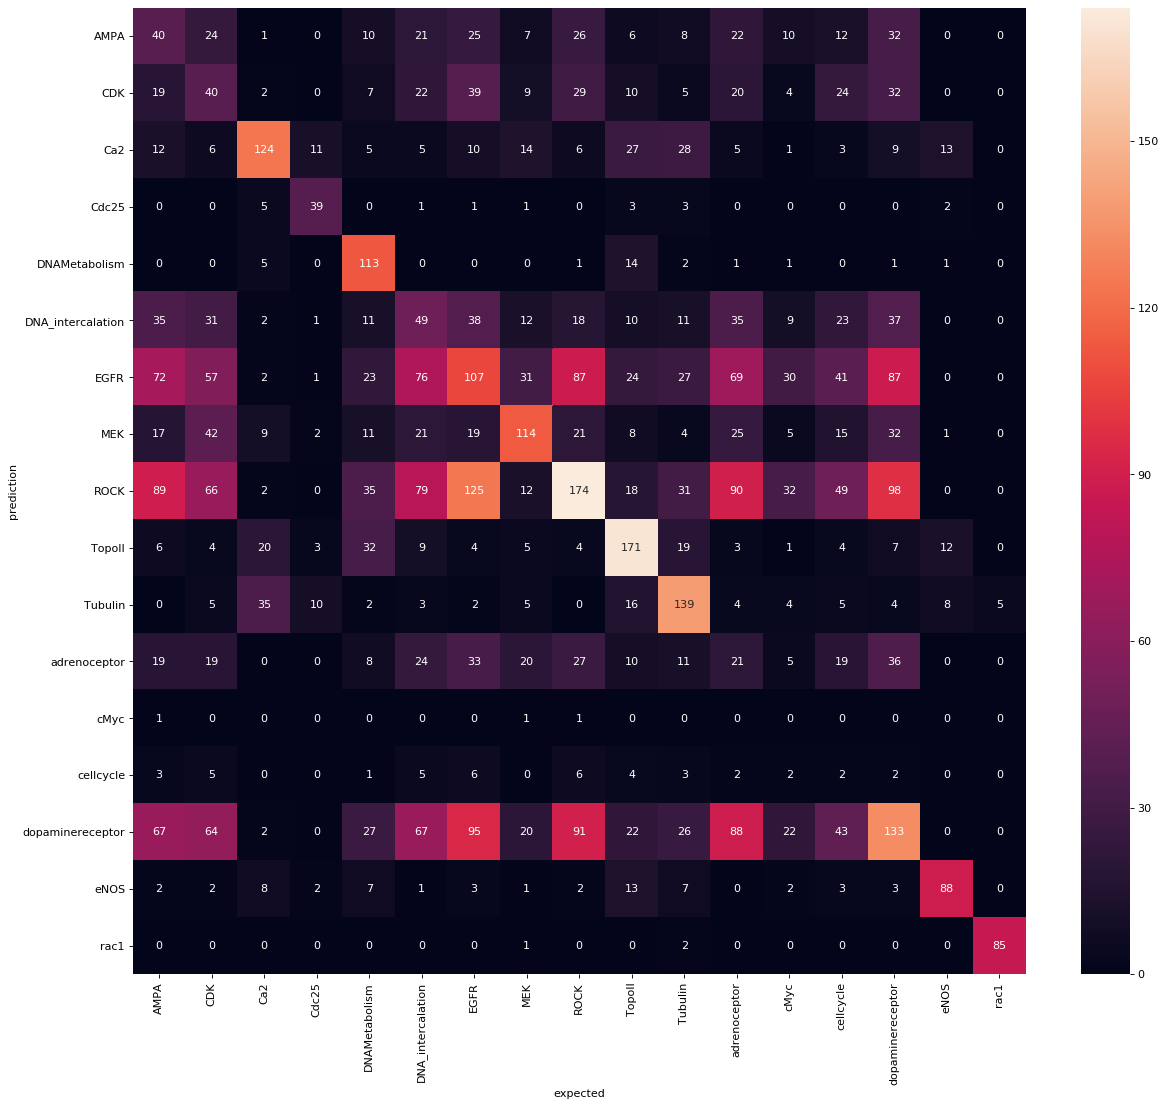

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 80, edgecolor='k')

sns.heatmap(conflusion_matrix, annot=True, fmt="g")
plt.show()

# F1 score

In [20]:
from sklearn.metrics import f1_score
print(f1_score(results.expected, results.prediction, average='macro'))

0.3383055877706649


# Retraining the best parameter set
The f1-score of model with tunned hyper parameters is even worst as without. 2 possible reasons:
- It was not trained on the full data set because of cross validation
- It was not big enough because n_estimators=100 instate of 1000 (for calculation time reasons)

In [21]:
from sklearn.ensemble import RandomForestClassifier

print(RFclf.best_params_)
retrained_RFclf = RandomForestClassifier(**RFclf.best_params_,  n_estimators=100)
retrained_RFclf.fit(X, Y)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [22]:
results_retrained = pd.DataFrame({"prediction": retrained_RFclf.predict(valX), "expected": valY})
print(f1_score(results_retrained.expected, results_retrained.prediction, average='macro'))


0.3428728818237719


In [23]:
from sklearn.ensemble import RandomForestClassifier

print(RFclf.best_params_)
retrained_RFclf_big = RandomForestClassifier(**RFclf.best_params_,  n_estimators=100)
retrained_RFclf_big.fit(X, Y)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [0]:
results_retrained_big = pd.DataFrame({"prediction": retrained_RFclf_big.predict(valX), "expected": valY})
print(f1_score(results_retrained_big.expected, results_retrained_big.prediction, average='macro'))